# Survey 1: Rating Facebook Post Appropriateness

In [1]:
# General Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# SK Learn Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Other Libraries
from astropy.table import Table
from astropy.io import ascii
from collections import Counter
from collections import OrderedDict

# Pre-Processing Data

## Import Data
This data was collected through "Survey 1 - Rating Facebook Content Appropriateness"

In [2]:
# Create Bag of Words Numpy Array
df = pd.read_csv("Data/results.csv", delimiter=",")
df.shape

(684, 46)

## Edit Data

Drop the first 151 rows of responses due to survey response issues that would violate research integrity.

Drop columns that do not contain information about question responses.

In [3]:
# Drop Rows
drop_rows = list(range(0, 151))
df = df.drop(drop_rows)
df = df.reset_index(drop=True)

# Export edited data 
df.to_csv('Data/results_edited.csv', index=False)

In [4]:
# Drop Columns
df = pd.read_csv("Data/results_edited.csv", delimiter=",")
drop_columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q39', 'Q40', 'Q40 - Topics', 'Q41']
df = df.drop(columns=drop_columns, axis=1)
df.shape

(533, 25)

In [5]:
# Replace NaN's with the mode
# df = df.fillna(df.mode().iloc[0])
df.dropna(inplace=True)
df

,Q3,Q4,Q5,Q6,Q7,Q10,Q12,Q14,Q16,Q18,...,Q27,Q28,Q29,Q30,Q31,Q33,Q34,Q35,Q36,Q37
0,2.0,1.0,3.0,5.0,2.0,2.0,4.0,6.0,3.0,3.0,...,3.0,2.0,4.0,5.0,3.0,3.0,2.0,4.0,4.0,5.0
1,1.0,6.0,1.0,2.0,1.0,5.0,2.0,1.0,1.0,2.0,...,1.0,7.0,6.0,4.0,5.0,1.0,6.0,7.0,1.0,1.0
2,5.0,7.0,6.0,1.0,5.0,7.0,3.0,3.0,2.0,5.0,...,2.0,7.0,4.0,3.0,5.0,5.0,3.0,3.0,6.0,2.0
3,1.0,3.0,4.0,2.0,2.0,5.0,1.0,4.0,2.0,2.0,...,2.0,4.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0
4,1.0,2.0,4.0,1.0,6.0,6.0,3.0,1.0,2.0,5.0,...,1.0,6.0,5.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0
5,4.0,7.0,7.0,3.0,3.0,6.0,1.0,1.0,1.0,2.0,...,1.0,7.0,5.0,5.0,5.0,7.0,5.0,5.0,2.0,1.0
7,3.0,6.0,5.0,1.0,3.0,6.0,3.0,3.0,1.0,3.0,...,1.0,6.0,5.0,2.0,4.0,3.0,5.0,5.0,3.0,2.0
8,7.0,7.0,2.0,1.0,4.0,3.0,1.0,3.0,2.0,2.0,...,1.0,7.0,7.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0
9,5.0,6.0,4.0,2.0,3.0,4.0,2.0,2.0,3.0,5.0,...,3.0,7.0,5.0,5.0,5.0,2.0,6.0,6.0,2.0,3.0
10,5.0,7.0,5.0,1.0,5.0,5.0,3.0,3.0,3.0,6.0,...,1.0,3.0,2.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0


In [6]:
# Export edited data 
df.to_csv('Data/results_no_metadata.csv', index=False)

In [7]:
# Convert all data to integers
df = pd.read_csv("Data/results_no_metadata.csv", delimiter=",", dtype=int)
response_numbers = len(df)
df = df.transpose()
index = df.index.values
df.shape

(25, 418)

### Isolate Community Standards

In [8]:
def isolate_data(a, b):
    data = df.iloc[a:b]
    return data, data.index.values

In [9]:
hate, hate_index = isolate_data(0, 5)
nudity, nudity_index = isolate_data(5, 10)
cruel, cruel_index = isolate_data(10, 15)
spam, spam_index = isolate_data(15, 20)
false, false_index = isolate_data(20, 25)

## Analyze Data

### Means and Variances

In [10]:
# Define function for getting means and variances
def get_stat(data):
    means = []
    sds = []    
    for i in range(len(data)):
        m = np.round(np.mean(data.iloc[i]), decimals=4)
        sd = np.round(np.std(data.iloc[i]), decimals=4)
        means.append(m)
        sds.append(sd) 
    return means, sds

In [11]:
# Get means and standard deviations for overall dataset
means, sds = get_stat(df)   

# Get means and standard deviations for each Community Standard
hate_means, hate_sds = get_stat(hate)
nudity_means, nudity_sds = get_stat(nudity)
cruel_means, cruel_sds = get_stat(cruel)
spam_means, spam_sds = get_stat(spam)
false_means, false_sds = get_stat(false)

#for i in range(len(index)):
    #print('%s: means=%.2f sd=%.2f' %(index[i], means[i], sds[i]))

### Figures for Means and Variances

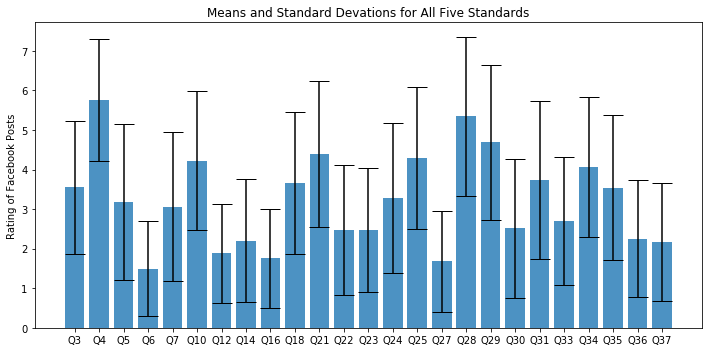

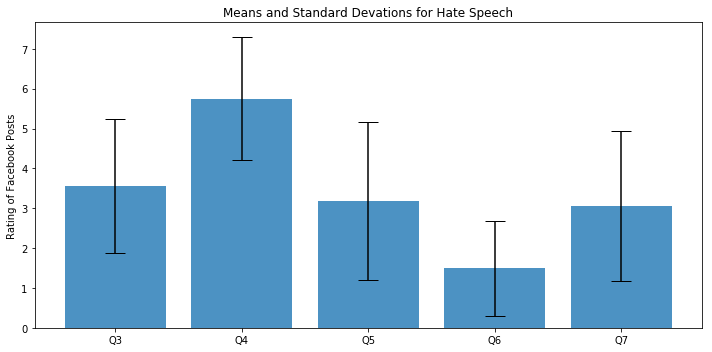

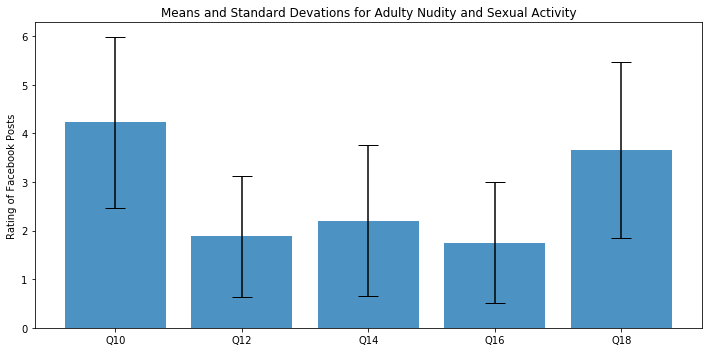

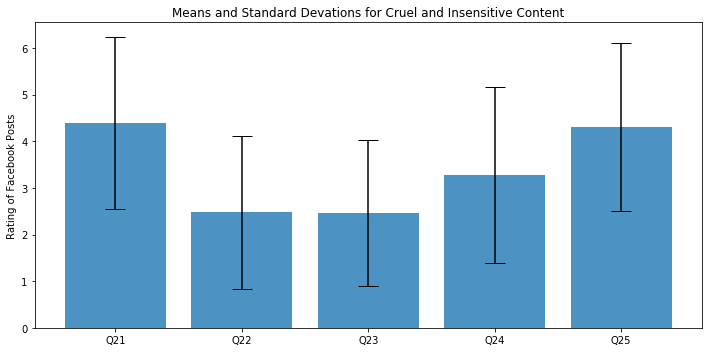

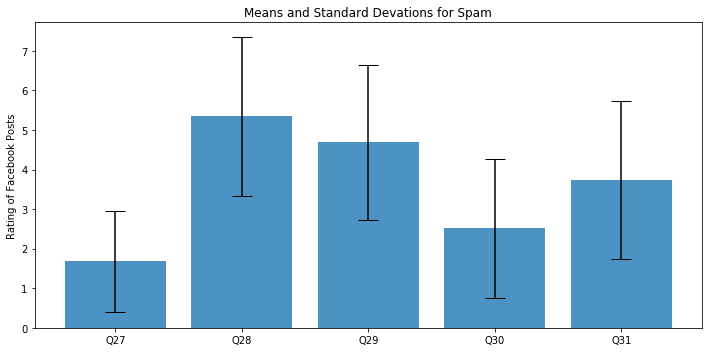

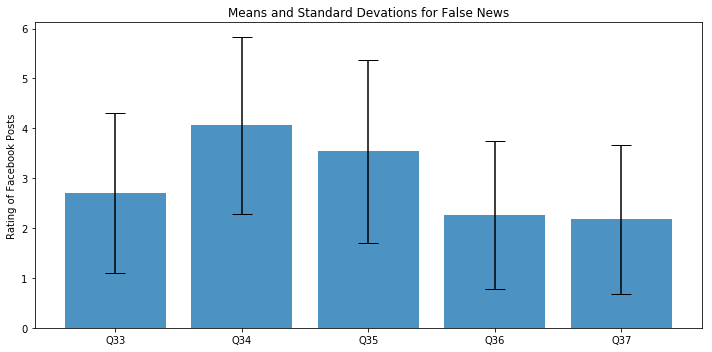

In [12]:
# Define function to create bar graph with error bars   
def plot_figs(index, means, sds, standard, file_name):
    fig = plt.figure(figsize=(10,5))
    plt.bar(index, means, yerr=sds, align='center', alpha=0.8, ecolor='black', capsize=10)
    plt.ylabel('Rating of Facebook Posts')
    plt.xticks(index)
    plt.title('Means and Standard Devations for %s' % standard)
    plt.tight_layout()
    plt.savefig('Figures/%s_bar_plot_with_error_bars.png' % file_name, overwrite=True)
    plt.show()

# Plot and save figures
plot_figs(index, means, sds, 'All Five Standards', 'all')  
plot_figs(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
plot_figs(nudity_index, nudity_means, nudity_sds, 'Adulty Nudity and Sexual Activity', 'nudity')
plot_figs(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Content', 'cruel')
plot_figs(spam_index, spam_means, spam_sds, 'Spam', 'spam')
plot_figs(false_index, false_means, false_sds, 'False News', 'false')

In [13]:
def create_stat_charts(index, means, sds, standard, file_name):
    t = Table([index, means, sds], names=('index', 'means', 'sds'), meta={'name': 'Table on Survey 1 %s Means and Variances' % file_name})
    ascii.write(t, 'Tables/table_of_%s_means_sds.csv' % file_name, format='csv', fast_writer=False, overwrite=True)
    print(t)
# Create charts with means and variances
create_stat_charts(index, means, sds, 'All', 'all')
create_stat_charts(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
create_stat_charts(nudity_index, nudity_means, nudity_sds, 'Adult Nudity and Sexual Activity', 'nudity')
create_stat_charts(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Speech', 'cruel')
create_stat_charts(spam_index, spam_means, spam_sds, 'Spam', 'spam')
create_stat_charts(false_index, false_means, false_sds, 'False News', 'false')

index means   sds  
----- ------ ------
   Q3 3.5502 1.6855
   Q4 5.7512 1.5468
   Q5 3.1842 1.9752
   Q6 1.4976 1.1906
   Q7  3.055 1.8828
  Q10 4.2273 1.7591
  Q12 1.8828 1.2444
  Q14 2.2057 1.5577
  Q16 1.7536 1.2505
  Q18 3.6603 1.8063
  ...    ...    ...
  Q25 4.3038 1.7947
  Q27  1.677 1.2711
  Q28 5.3469 2.0052
  Q29 4.6866 1.9515
  Q30  2.512 1.7529
  Q31 3.7368 1.9922
  Q33 2.7033 1.6098
  Q34 4.0598 1.7727
  Q35 3.5383 1.8353
  Q36  2.256 1.4832
  Q37 2.1746  1.495
Length = 25 rows
index means   sds  
----- ------ ------
   Q3 3.5502 1.6855
   Q4 5.7512 1.5468
   Q5 3.1842 1.9752
   Q6 1.4976 1.1906
   Q7  3.055 1.8828
index means   sds  
----- ------ ------
  Q10 4.2273 1.7591
  Q12 1.8828 1.2444
  Q14 2.2057 1.5577
  Q16 1.7536 1.2505
  Q18 3.6603 1.8063
index means   sds  
----- ------ ------
  Q21   4.39  1.848
  Q22 2.4737 1.6327
  Q23 2.4665 1.5667
  Q24 3.2799  1.892
  Q25 4.3038 1.7947
index means   sds  
----- ------ ------
  Q27  1.677 1.2711
  Q28 5.3469 2.0052
  Q

### Bar Graphs for Each Question

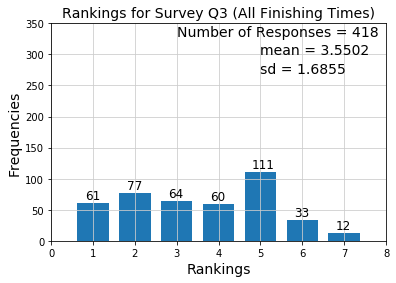

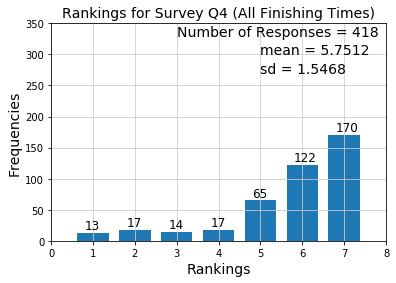

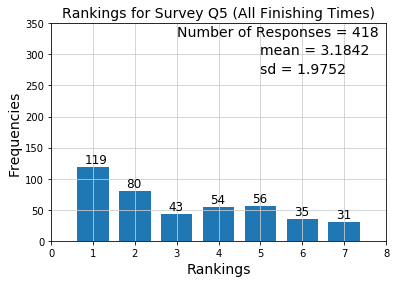

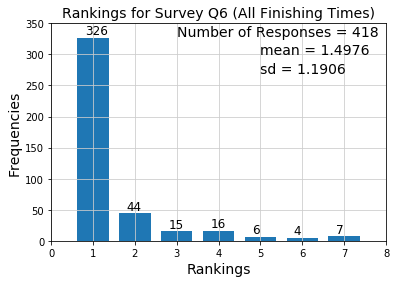

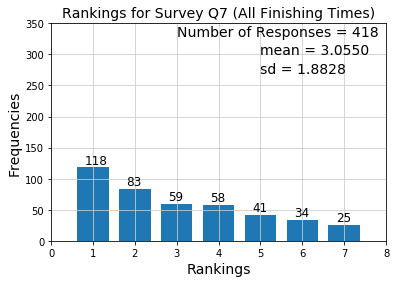

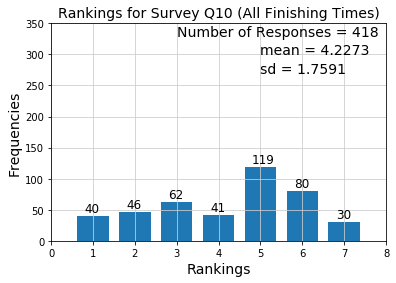

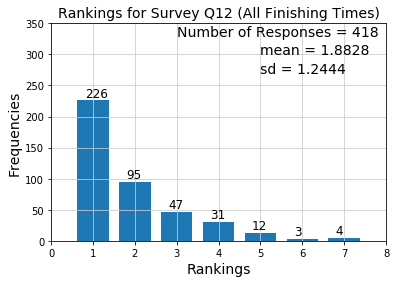

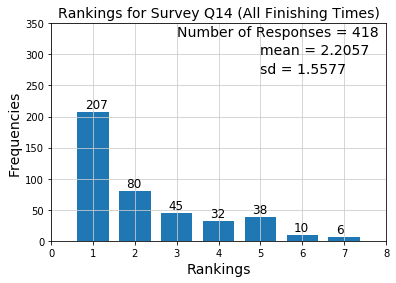

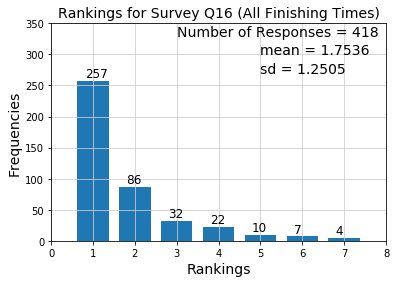

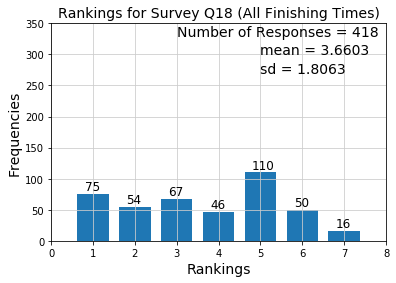

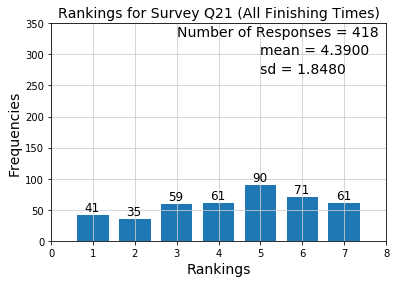

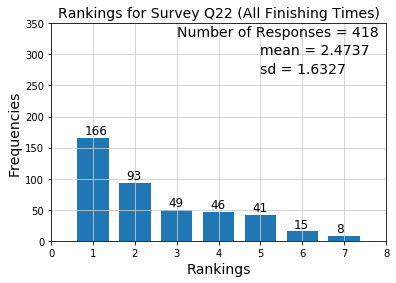

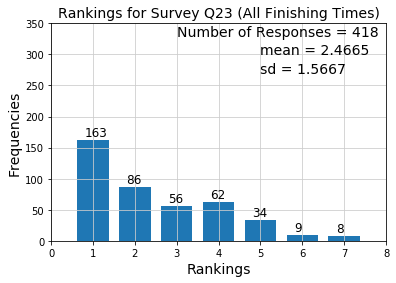

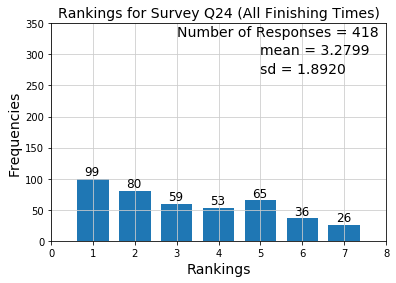

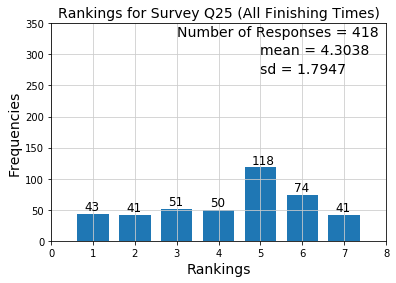

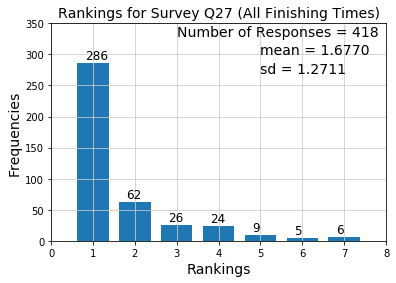

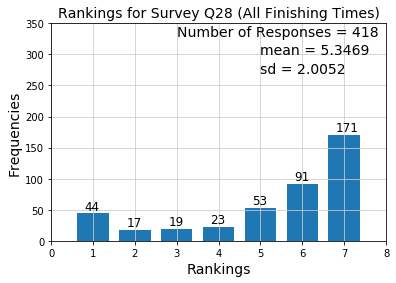

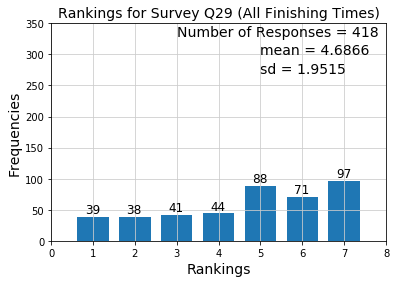

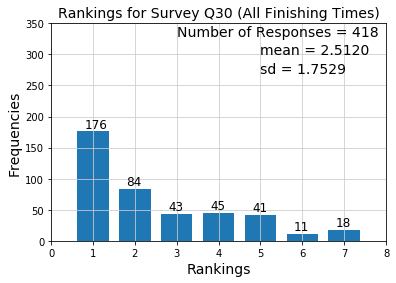

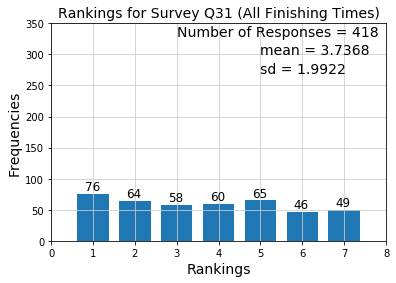

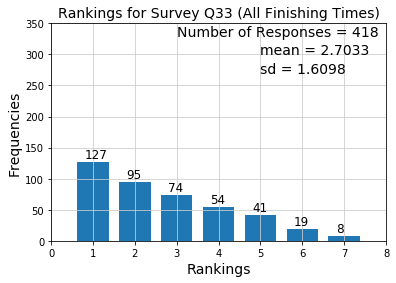

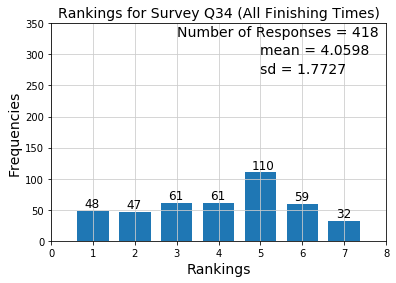

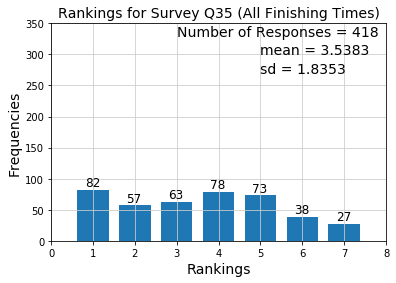

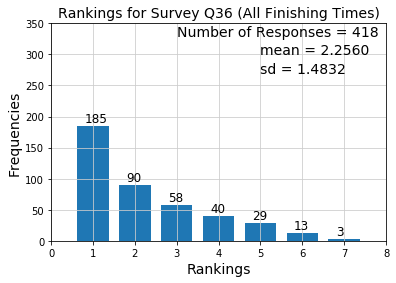

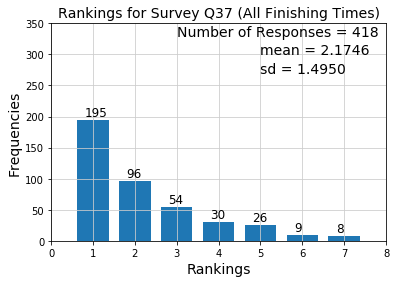

In [14]:
def get_counts(data):
    final_counts = []
    counts = Counter(data.iloc[0])
    counts = OrderedDict(sorted(counts.items()))
    for key, value in counts.items():
        final_counts.append(value)
    return final_counts

def graph(data):
    for i in range(25):
        data, index = isolate_data(i, i+1)
        counts = get_counts(data)
        bar_spacing = list(range(1, 8, 1))
        plt.bar(bar_spacing, counts, width=0.75)
        for j in range(7):
            plt.text(x=bar_spacing[j]-0.2, y=counts[j]+6, s=counts[j], fontsize=12)
        plt.xlabel('Rankings', fontsize=14)
        plt.ylabel('Frequencies', fontsize=14)
        plt.title('Rankings for Survey %s (All Finishing Times)' % index[0], fontsize=14)
        plt.text(3, 330,'Number of Responses = %i' % response_numbers, fontsize=14)
        plt.text(5, 300,'mean = %.4f' % means[i], fontsize=14)
        plt.text(5, 270,'sd = %.4f' % sds[i], fontsize=14)
        plt.axis([0, 8, 0, 350])
        plt.grid(True, ls="-", color='0.8')
        plt.savefig('Figures/%s_ranking_bar_plot.png' % index[0], overwrite=True)
        plt.show()
        
graph(df)

## Sanity Checking Plots

There are certain questions (Q6, Q12, Q16, Q27, Q37) that are unambiguously compliant with the Facebook guidelines. Worth preparing another figure for each question, filtering out participants who responded 5+ to any of those questions (i.e., treating them as calibration questions).

In [17]:
calibration_Qs = ['Q6', 'Q12', 'Q16', 'Q27', 'Q37']

In [35]:
calibration_drop_rows = []
for i in calibration_Qs:
    for j in range(len(df.loc[i])):
        if df.loc[i,j] > 4 and j not in calibration_drop_rows:
            calibration_drop_rows.append(j)    
calibration_drop_rows.sort()
len(calibration_drop_rows)

82